#  Error analysis - Tau Hybrid Solver

The hybrid solver is capable of solving models which include both discrete and continuous species.  In order for a species to be considered continuously, it must be included in a rate_rule, along with it's rate of change.  This species can then be considered in reactions by explicitly declaring the species as part of the reaction's propensity function.

### Imports

In [10]:
import sys, os
import matplotlib.pyplot as plt
import numpy
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../../GillesPy2')))
import gillespy2
from gillespy2 import TauHybridSolver
from gillespy2 import TauHybridCSolver

### Instantiate Model
Model requires species, parameters, and reactions.  rate_rules can also be added to model a species continuously

In [16]:
class SimpleHybridModel(gillespy2.Model):
     def __init__(self, parameter_values=None, init_v=1, mode='dynamic'):
            #initialize Model
            gillespy2.Model.__init__(self, name="Simple_Hybrid_Model")

            
            #Species
            A = gillespy2.Species(name='A', initial_value=0, mode=mode)
            '''
            Setting the continuous species.mode to "continuous" will prevent this species from being
            considered discretely, and allows it to be modeled continuously with a rate rule.
            '''
            V = gillespy2.Species(name='V', initial_value=init_v, mode='continuous')

            self.add_species([A, V])
            
            #parameters
            rate1 = gillespy2.Parameter(name='rate1', expression= 20.0)
            rate2 = gillespy2.Parameter(name='rate2', expression= 10.0)
            
            #rate_rules
            '''We create a rate rule with two arguments.  The first is the species
            to be governed by the rate rule.  In this case, we choose our
            previously declared continuous species "V" and give it the rate function of
            cos(t).
            '''
            rate_rule1 = gillespy2.RateRule(variable="V", formula="cos(t)", name="rr1")
            self.add_parameter([rate1, rate2])
            self.add_rate_rule([rate_rule1])
            
            #reactions
            '''
            Because we want to use our continuous species "V" in the propensity function
            for r1, we associate a custom propensity function, rather than a simple rate.
            Here we can simply use the rate times our continuous species "V".'''
            r1 = gillespy2.Reaction(name="r1",reactants={}, products={A:1},
                   propensity_function="rate1 * V")
            
            r2 = gillespy2.Reaction(name="r2",reactants={A:1}, products={},
                    rate=rate2)
            
            self.add_reaction([r1, r2])
            
            self.timespan(gillespy2.TimeSpan.linspace(t=20, num_points=201))

In [17]:
dmodel = SimpleHybridModel(mode='continuous')

### Run Model and Plot

In [22]:
%time dp_results = dmodel.run(solver=TauHybridSolver)

CPU times: user 211 ms, sys: 7.92 ms, total: 219 ms
Wall time: 218 ms


In [23]:
%time dc_results = dmodel.run(solver=TauHybridCSolver)

CPU times: user 12.4 ms, sys: 12.1 ms, total: 24.5 ms
Wall time: 19.2 s


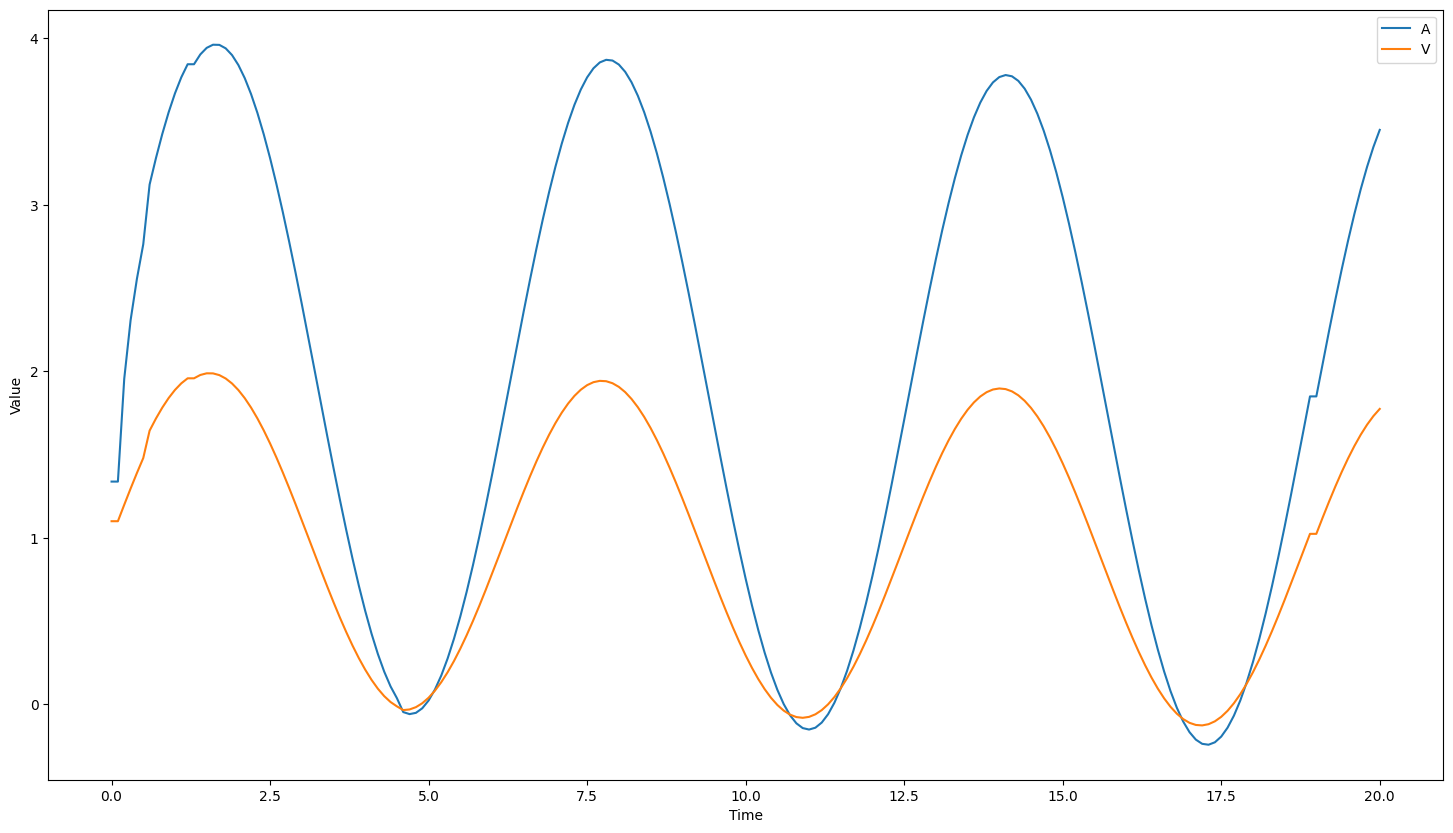

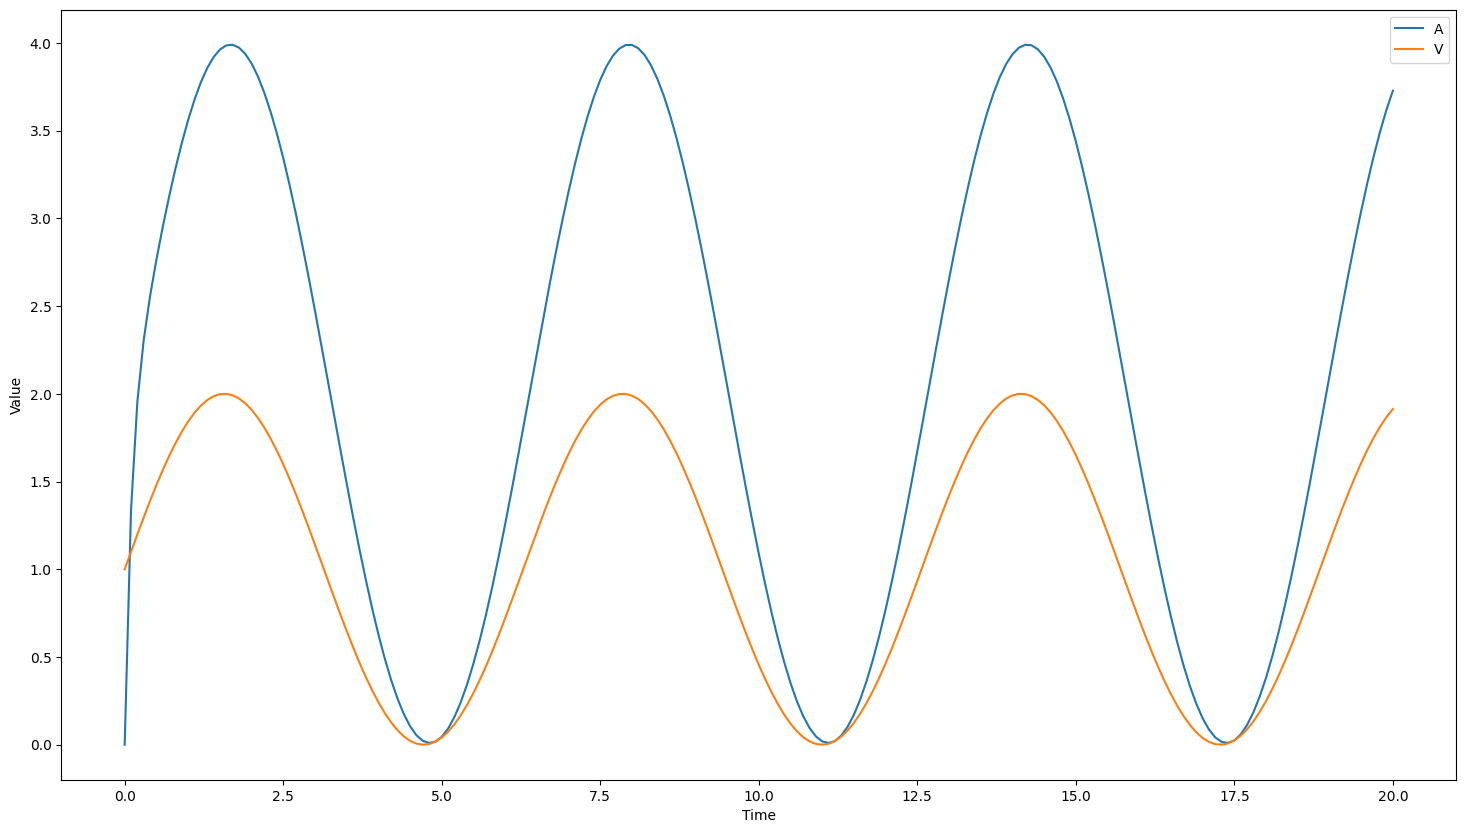

In [24]:
dp_results.plot()
dc_results.plot()


In [20]:
# fig = plt.figure(figsize=(3.54,3.54), dpi=600)
# plt.plot(results['time'], results['A'], '-b', label='Discrete')
# plt.plot(results['time'], results['V'], '-r', label='Continuous')
# plt.title("Coupled Stochastic-Deterministic", fontsize=14)
# plt.xlabel('Time', fontsize=12)
# plt.ylabel('Population', fontsize=12)
# plt.xticks(fontsize=8)
# plt.yticks(fontsize=8)
# plt.legend(loc='best', fontsize=8)
# #plt.savefig('../images/', bbox_inches='tight')

In [88]:
hmodel = dmodel = SimpleHybridModel(mode='discrete')

In [26]:
%time hp_results = hmodel.run(solver=TauHybridSolver)

CPU times: user 302 ms, sys: 13.5 ms, total: 315 ms
Wall time: 284 ms


In [91]:
%time hc_results = hmodel.run(solver=TauHybridCSolver)

CPU times: user 17 ms, sys: 12.3 ms, total: 29.3 ms
Wall time: 15 s


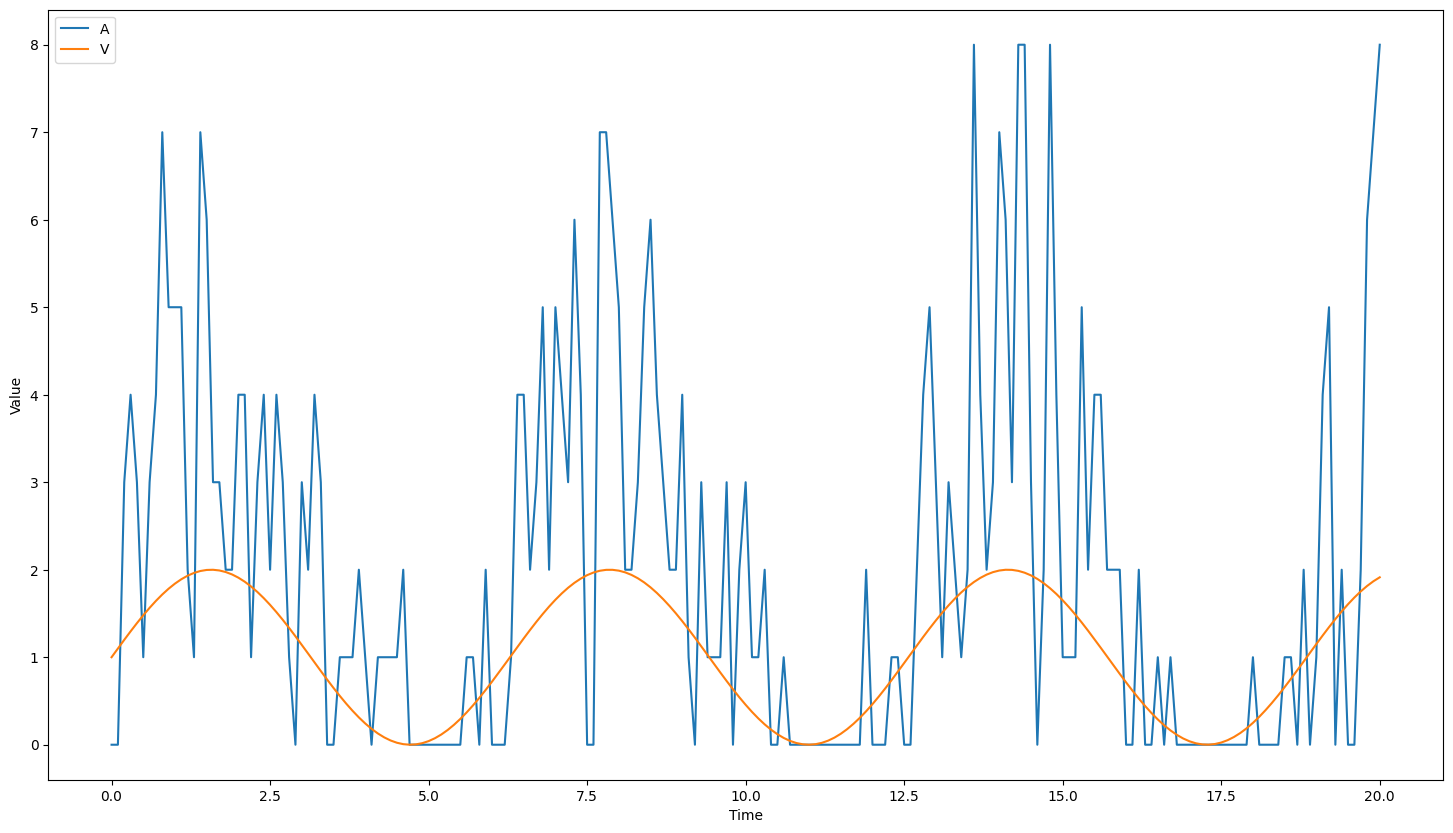

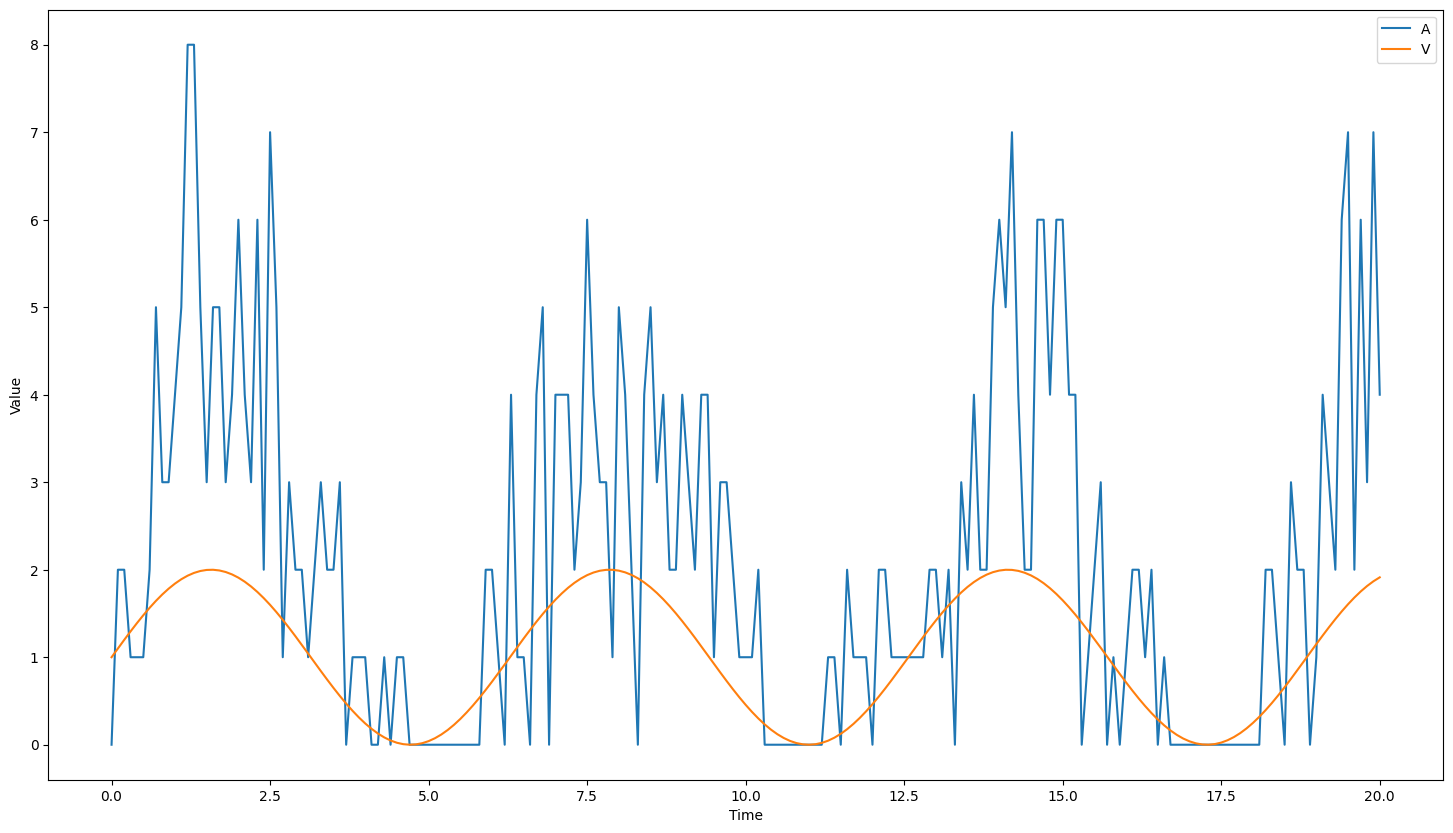

In [28]:
hp_results.plot()
hc_results.plot()

CPU times: user 3.82 s, sys: 53.6 ms, total: 3.87 s
Wall time: 3.7 s
CPU times: user 19.3 ms, sys: 16.4 ms, total: 35.7 ms
Wall time: 20.6 s


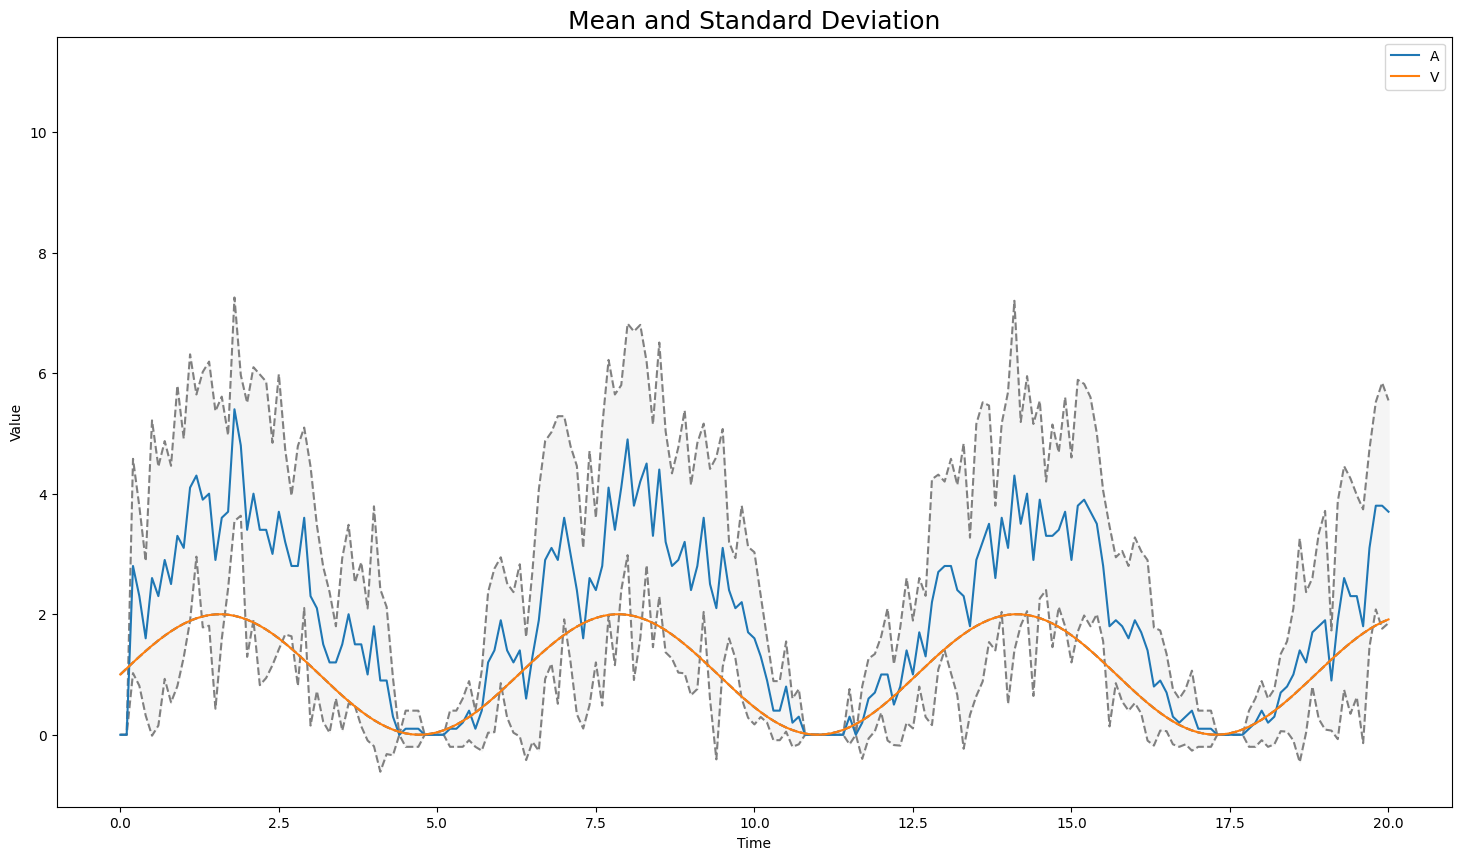

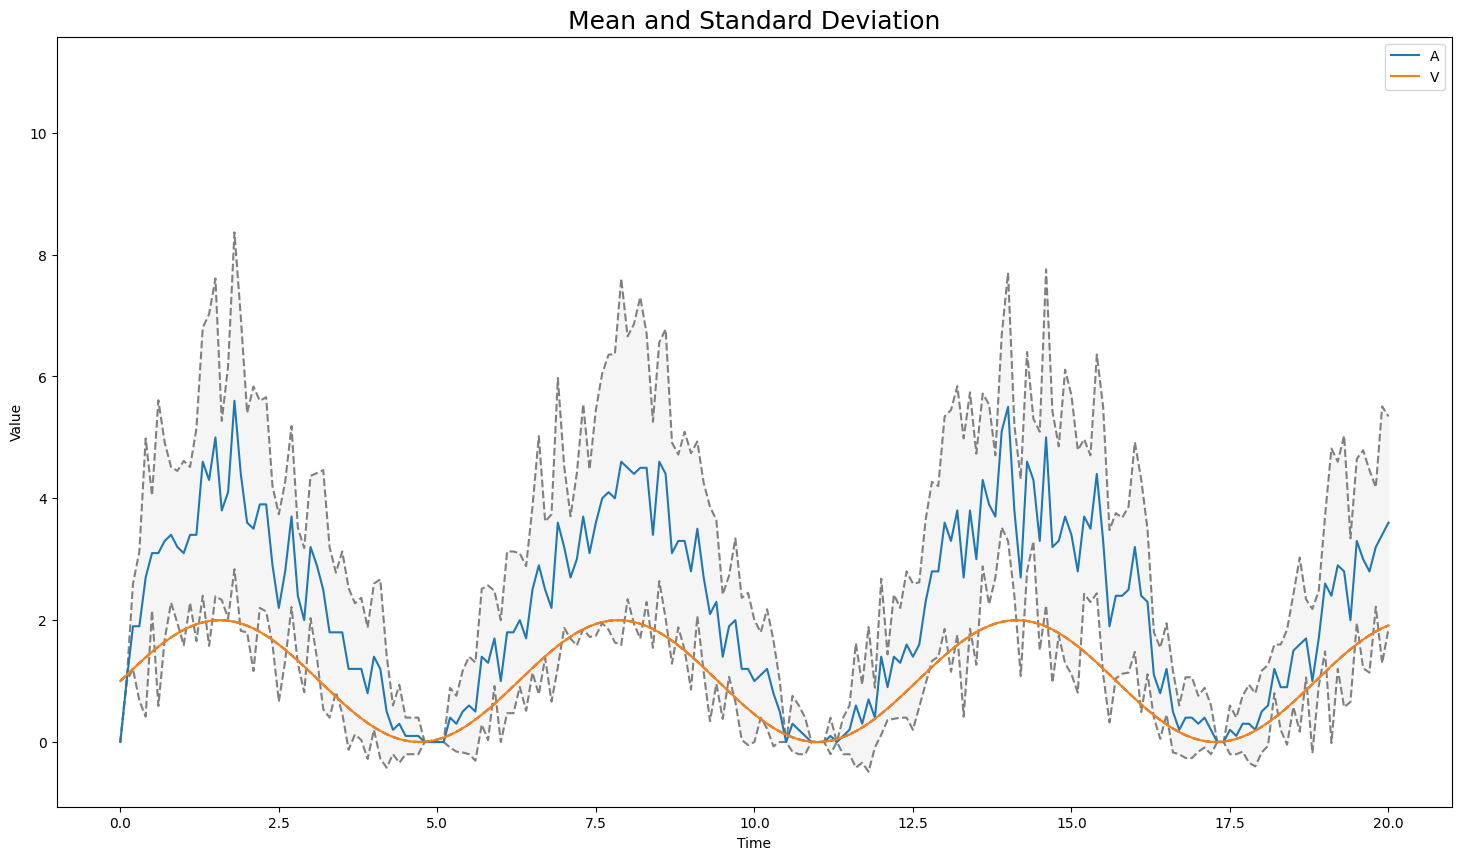

In [58]:
%time hp10_results = hmodel.run(solver=TauHybridSolver, number_of_trajectories=10)
%time hc10_results = hmodel.run(solver=TauHybridCSolver, number_of_trajectories=10)
hp10_results.plot_mean_stdev()
hc10_results.plot_mean_stdev()

CPU times: user 39.4 s, sys: 473 ms, total: 39.9 s
Wall time: 39 s
CPU times: user 154 ms, sys: 12.5 ms, total: 166 ms
Wall time: 21.9 s


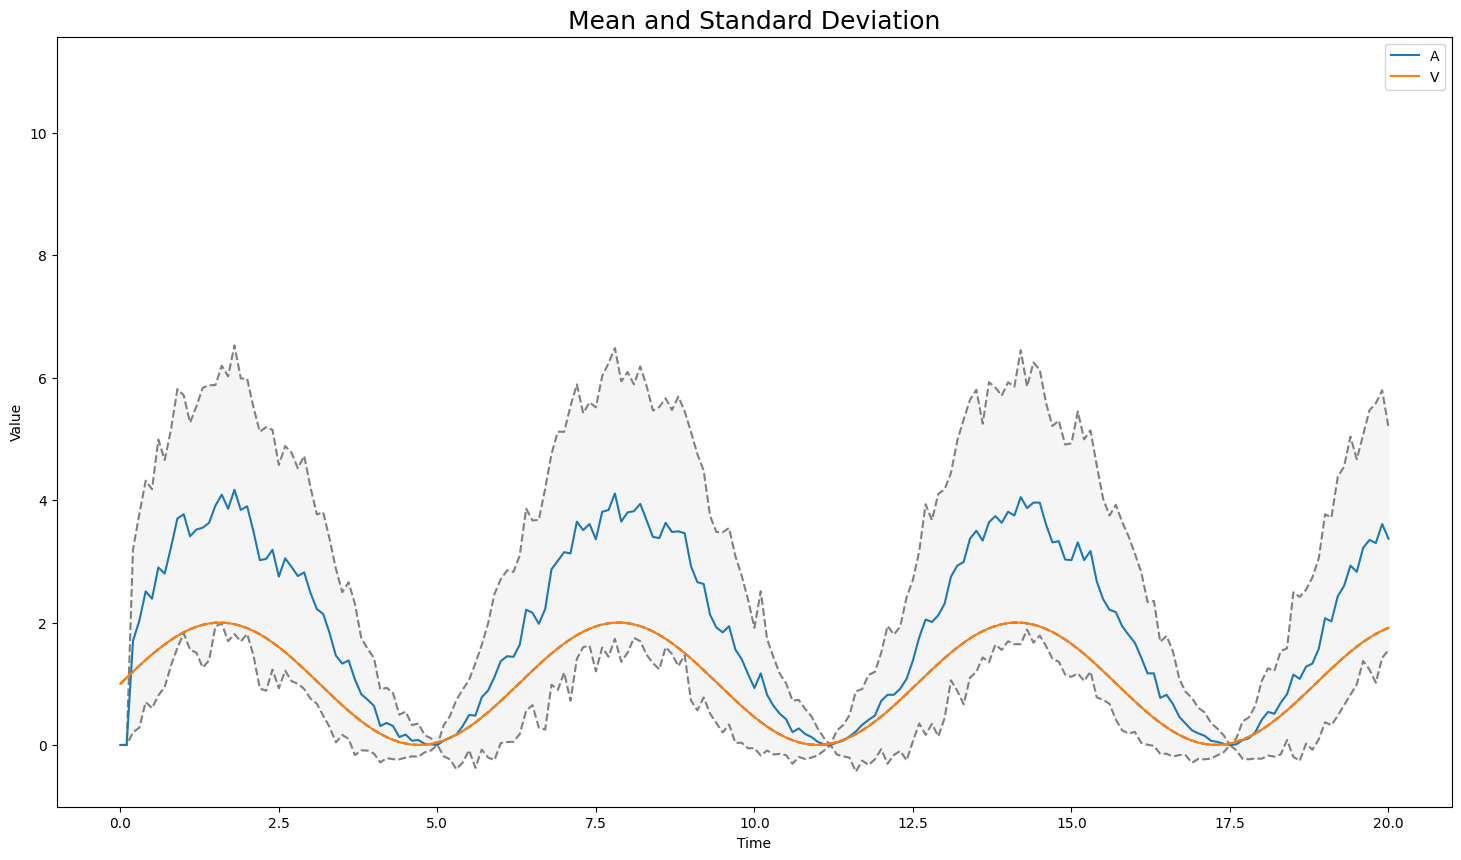

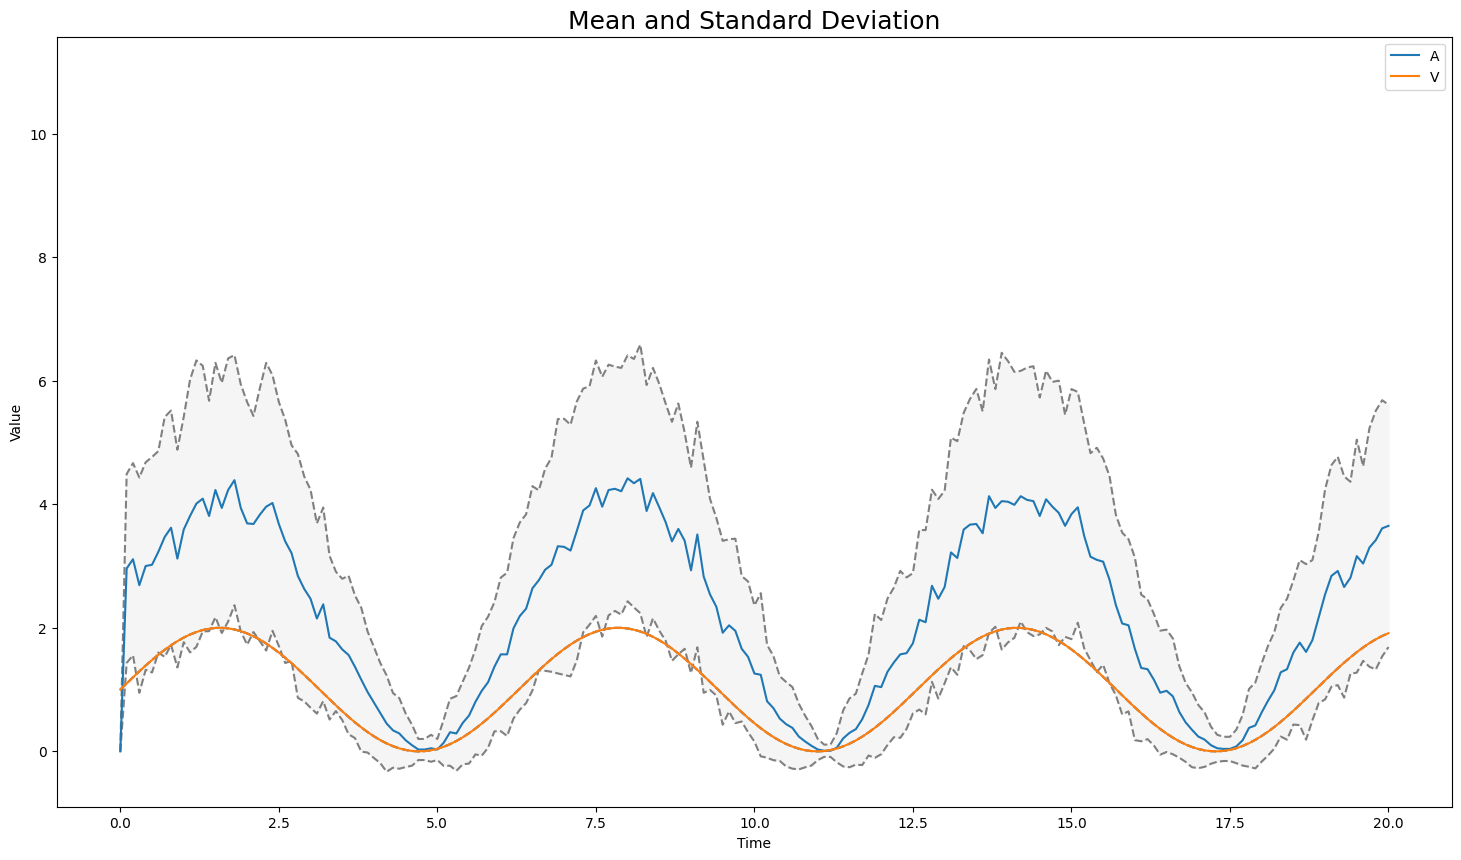

In [36]:
%time hp100_results = hmodel.run(solver=TauHybridSolver, number_of_trajectories=100)
%time hc100_results = hmodel.run(solver=TauHybridCSolver, number_of_trajectories=100)
hp100_results.plot_mean_stdev()
hc100_results.plot_mean_stdev()

In [33]:
%time hp1000_results = hmodel.run(solver=TauHybridSolver, number_of_trajectories=1000)

CPU times: user 5min 59s, sys: 3.57 s, total: 6min 2s
Wall time: 5min 53s


In [34]:
%time hc1000_results = hmodel.run(solver=TauHybridCSolver, number_of_trajectories=1000)

CPU times: user 1.29 s, sys: 60.6 ms, total: 1.35 s
Wall time: 38.8 s


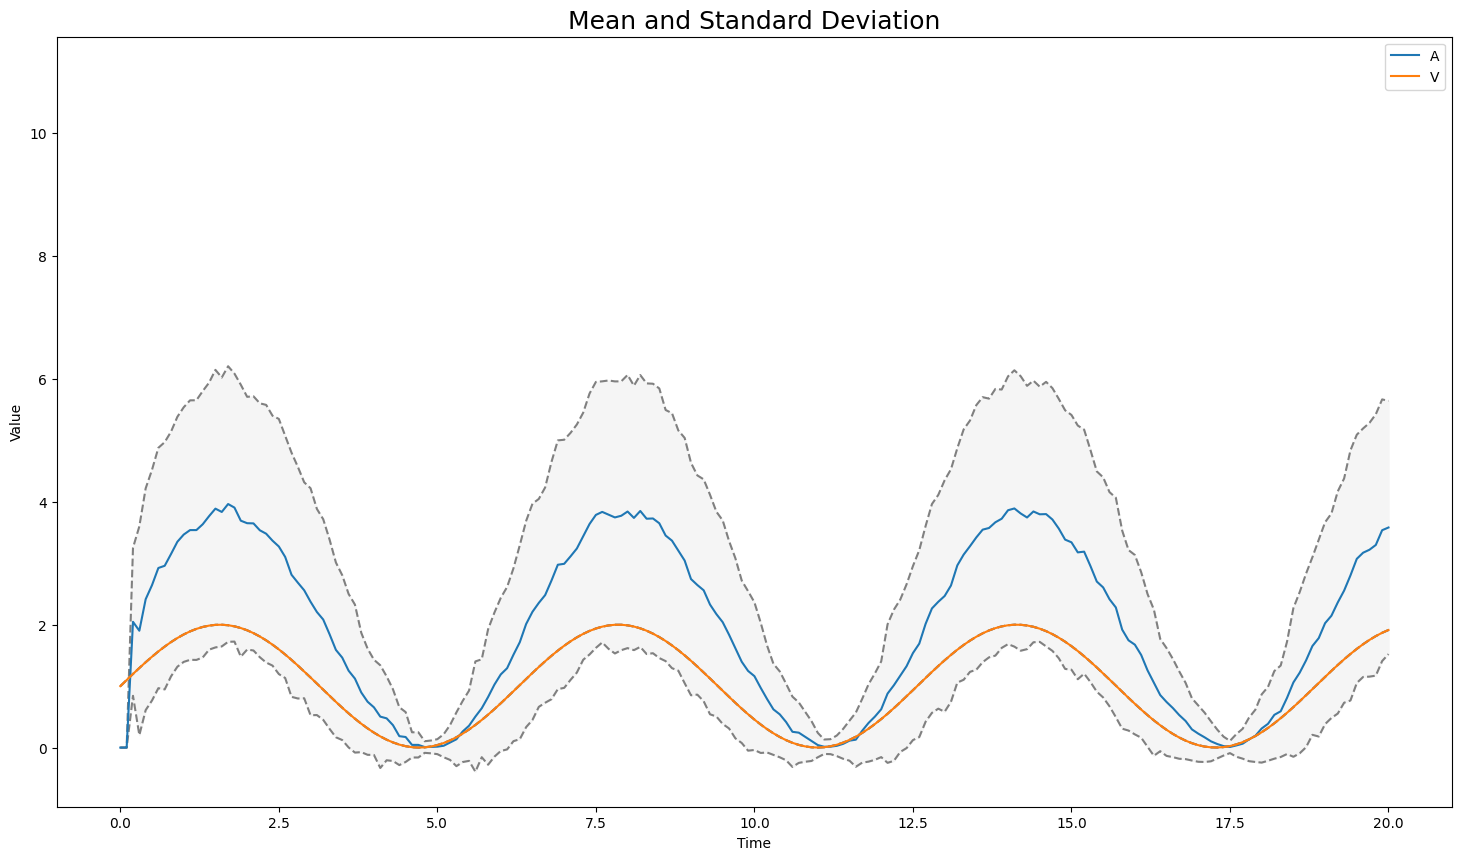

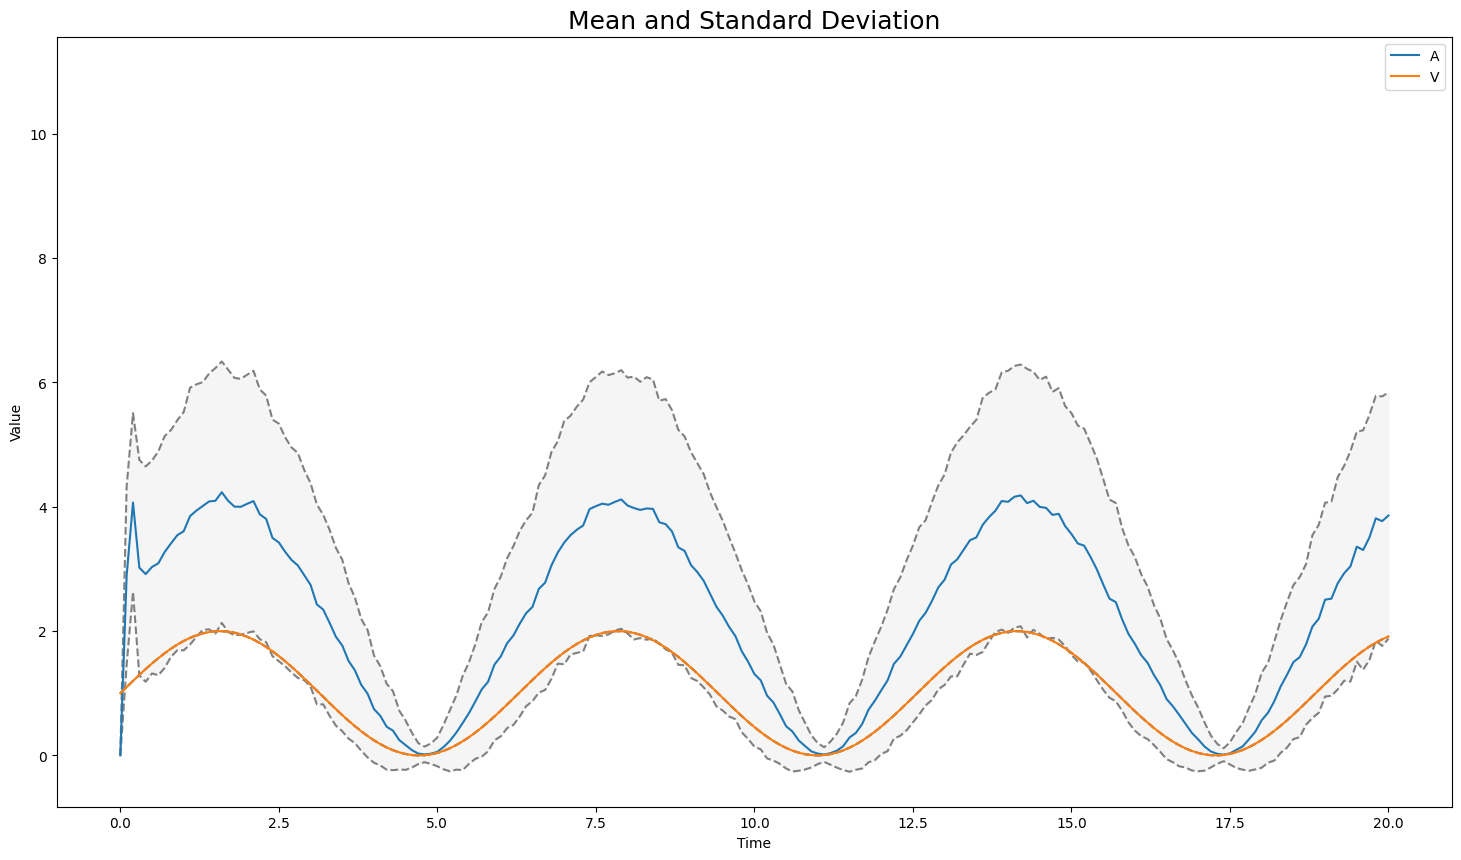

In [35]:
hp1000_results.plot_mean_stdev()
hc1000_results.plot_mean_stdev()

In [95]:
%time hc10000_results = hmodel.run(solver=TauHybridCSolver, number_of_trajectories=10000)
hc10000_results.plot_mean_stdev()

CPU times: user 33.5 s, sys: 5.27 s, total: 38.8 s
Wall time: 8min 16s


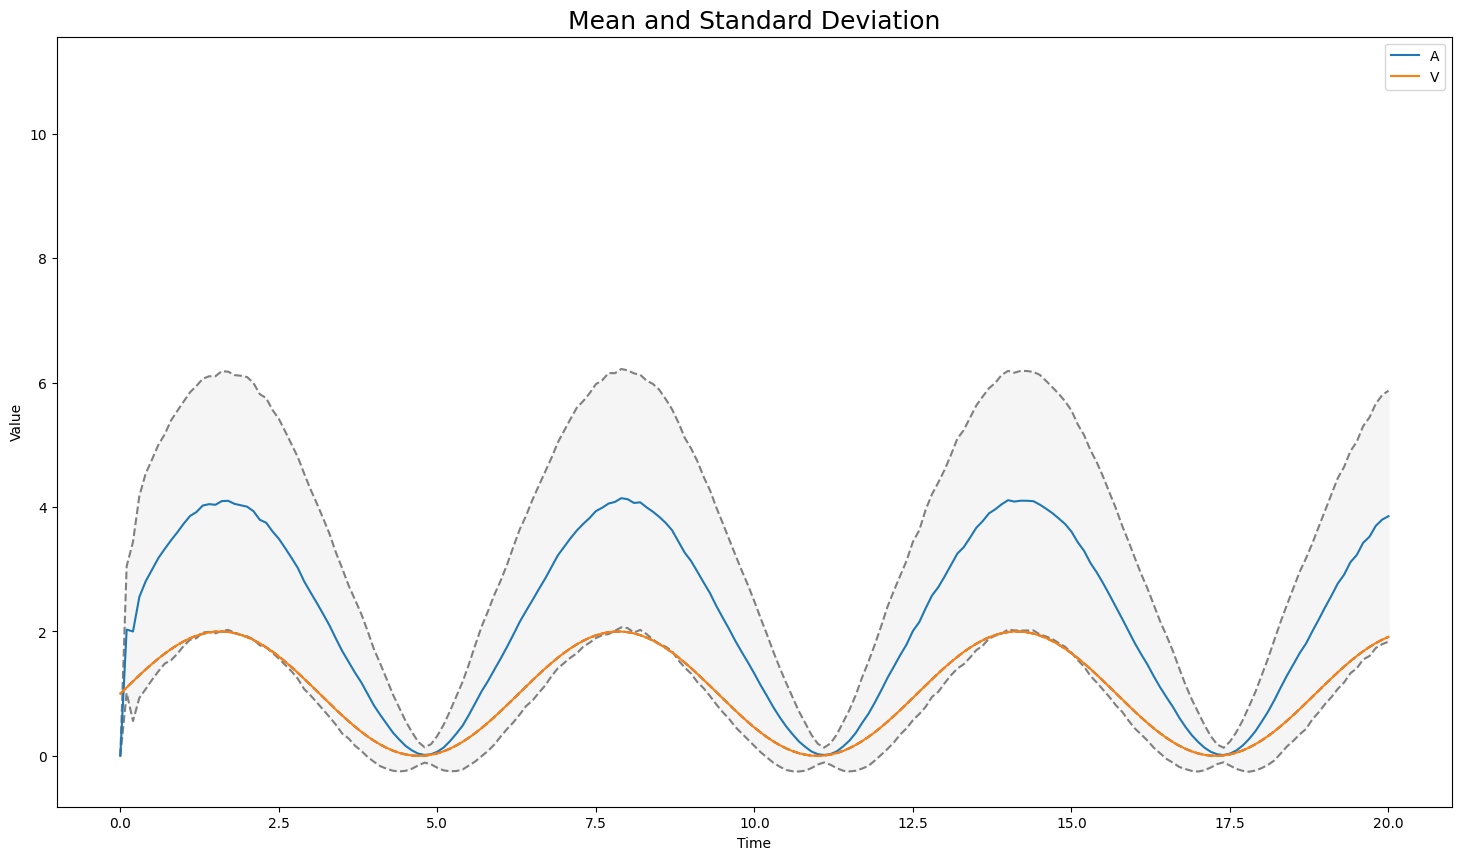

In [96]:
hc10000_results.plot_mean_stdev()


In [87]:
%time hc10000_results = hmodel.run(solver=TauHybridCSolver, number_of_trajectories=10000)

SimulationError: argument 'solver=<gillespy2.solvers.cpp.tau_hybrid_c_solver.TauHybridCSolver object at 0x7f4a24dc4940>' to run() failed.  Reason Given: Negative State detected in step, and no reaction found to fire.

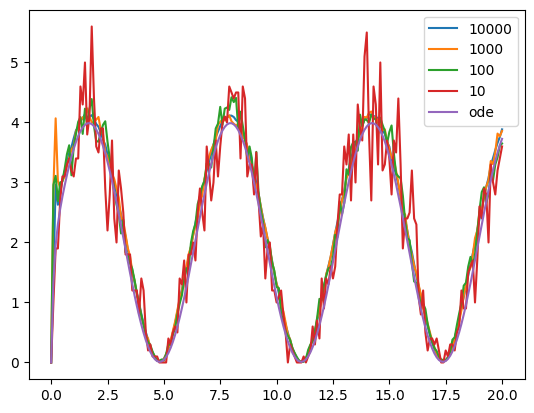

In [70]:
d10000 = hc10000_results.average_ensemble()
plt.plot(d10000['time'],d10000['A'], label='10000')
d1000 = hc1000_results.average_ensemble()
plt.plot(d1000['time'],d1000['A'], label='1000')
d100 = hc100_results.average_ensemble()
plt.plot(d100['time'],d100['A'], label='100')
d10 = hc10_results.average_ensemble()
plt.plot(d10['time'],d10['A'], label='10')
#plt.plot(hc_results['time'], hc_results['A'], label='1')
plt.plot(dc_results['time'], dc_results['A'], label='ode')
plt.legend(loc='best')

In [53]:
import scipy

In [60]:
scipy.linalg.norm( d10['A']-dc_results['A'] , ord=2)

6.7238306444199205

In [57]:
scipy.linalg.norm( d100['A']-dc_results['A'] , ord=2)

3.9424589471598064

In [56]:
scipy.linalg.norm( d1000['A']-dc_results['A'] , ord=2)

3.852944752539337

In [71]:
scipy.linalg.norm( d10000['A']-dc_results['A'] , ord=2)

2.8454190504536254

Text(0, 0.5, 'Error (L2-norm of mean v ODE) ')

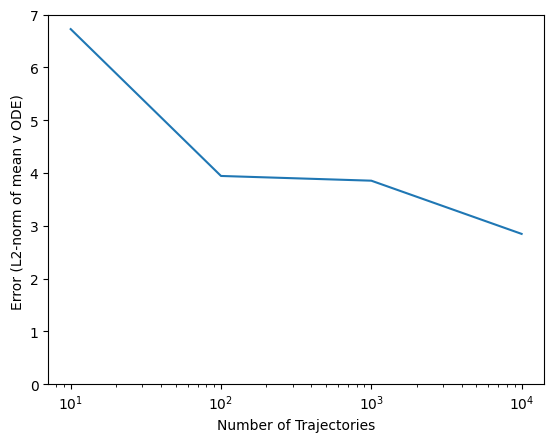

In [75]:
x_values = [10,100,1000,10000]
y_values = [
    scipy.linalg.norm( d10['A']-dc_results['A'] , ord=2),
    scipy.linalg.norm( d100['A']-dc_results['A'] , ord=2),
    scipy.linalg.norm( d1000['A']-dc_results['A'] , ord=2),
    scipy.linalg.norm( d10000['A']-dc_results['A'] , ord=2)
]
plt.semilogx(x_values,y_values)
plt.ylim([0, 7])
plt.xlabel('Number of Trajectories')
plt.ylabel('Error (L2-norm of mean v ODE) ')

In [76]:
%time hc1000_tau001_results = hmodel.run(solver=TauHybridCSolver, number_of_trajectories=1000, tau_tol=0.01)

CPU times: user 862 ms, sys: 16 ms, total: 878 ms
Wall time: 25.7 s


In [77]:
%time hc1000_tau002_results = hmodel.run(solver=TauHybridCSolver, number_of_trajectories=1000, tau_tol=0.02)

CPU times: user 995 ms, sys: 15.9 ms, total: 1.01 s
Wall time: 27.6 s


In [78]:
%time hc1000_tau004_results = hmodel.run(solver=TauHybridCSolver, number_of_trajectories=1000, tau_tol=0.04)

CPU times: user 936 ms, sys: 32.3 ms, total: 968 ms
Wall time: 26.7 s


In [82]:
%time hc1000_tau005_results = hmodel.run(solver=TauHybridCSolver, number_of_trajectories=1000, tau_tol=0.05)

CPU times: user 723 ms, sys: 28.8 ms, total: 752 ms
Wall time: 23.9 s


In [84]:
%time hc1000_tau0005_results = hmodel.run(solver=TauHybridCSolver, number_of_trajectories=1000, tau_tol=0.005)

CPU times: user 753 ms, sys: 28.9 ms, total: 782 ms
Wall time: 25.2 s


In [85]:
%time hc1000_tau0001_results = hmodel.run(solver=TauHybridCSolver, number_of_trajectories=1000, tau_tol=0.001)

CPU times: user 959 ms, sys: 24 ms, total: 983 ms
Wall time: 26.3 s


Text(0, 0.5, 'Error (L2-norm of mean v ODE) ')

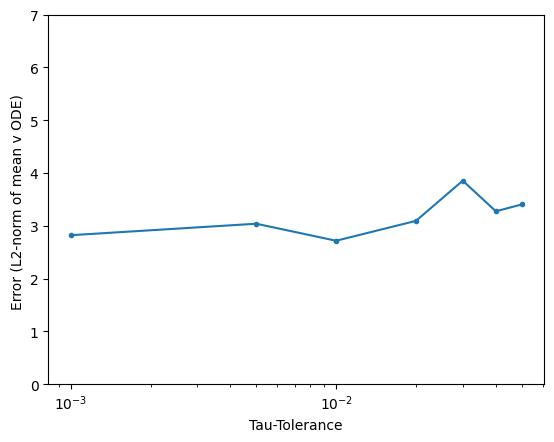

In [92]:
d1000_tau0001 = hc1000_tau0001_results.average_ensemble()
d1000_tau0005 = hc1000_tau0005_results.average_ensemble()


d1000_tau001 = hc1000_tau001_results.average_ensemble()
d1000_tau002 = hc1000_tau002_results.average_ensemble()
d1000_tau003 = hc1000_results.average_ensemble()
d1000_tau004 = hc1000_tau004_results.average_ensemble()
d1000_tau005 = hc1000_tau005_results.average_ensemble()

x_values = [0.001, 0.005, 0.01, 0.02, 0.03, 0.04, 0.05]
y_values = [
    scipy.linalg.norm( d1000_tau0001['A']-dc_results['A'] , ord=2),
    scipy.linalg.norm( d1000_tau0005['A']-dc_results['A'] , ord=2),
    scipy.linalg.norm( d1000_tau001['A']-dc_results['A'] , ord=2),
    scipy.linalg.norm( d1000_tau002['A']-dc_results['A'] , ord=2),
    scipy.linalg.norm( d1000_tau003['A']-dc_results['A'] , ord=2),
    scipy.linalg.norm( d1000_tau004['A']-dc_results['A'] , ord=2),
    scipy.linalg.norm( d1000_tau005['A']-dc_results['A'] , ord=2)
]
plt.semilogx(x_values,y_values, '.-')
plt.ylim([0, 7])
plt.xlabel('Tau-Tolerance')
plt.ylabel('Error (L2-norm of mean v ODE) ')